## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:

# df.loc[df['waterfront'] == np.nan]

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
# one hot encoding bedrooms, bathrooms, floors, condition, grade, zipcode
bedbath_encoder = OneHotEncoder(drop='first',categories='auto', 
                                categorical_features=['bedrooms','bathrooms']).fit()

array([[3],
       [3],
       [2],
       ...,
       [2],
       [3],
       [2]])

In [37]:
bedrooms = df['bedrooms'].values.reshape(-1,1)
bed_encoder = OneHotEncoder(drop='first', categories='auto').fit(bedrooms)
# bed_encoder.categories_
# bed_encoder.get_feature_names(['bedrooms'])
ohe_bed = pd.DataFrame(bed_encoder.transform(bedrooms).toarray(),
                      columns=bed_encoder.get_feature_names(['bedrooms']))

,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bedrooms_33
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df_ohe = pd.concat([df.drop(columns='bedrooms'), ohe_bed], axis=1)
df_ohe.head()

,id,date,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bedrooms_33
0,7129300520,10/13/2014,221900.0,1.00,1180,5650,1.0,NaN,0.0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6414100192,12/9/2014,538000.0,2.25,2570,7242,2.0,0.0,0.0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5631500400,2/25/2015,180000.0,1.00,770,10000,1.0,0.0,0.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,3.00,1960,5000,1.0,0.0,0.0,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1954400510,2/18/2015,510000.0,2.00,1680,8080,1.0,0.0,0.0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


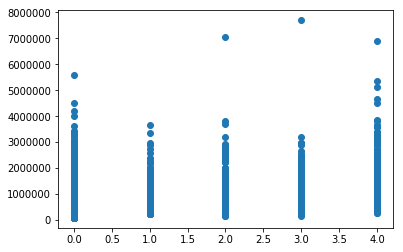

In [28]:
plt.scatter(df['view'], df['price'])

In [76]:

def replace_yr_ren(yr_ren,yr_built):
   """takes two lists and if yr_ren is np.nan, it returns yr_built"""
   output=[]
   for index, year in enumerate(yr_ren):
       if (np.isnan(year)) | (year==0):
           output.append(yr_built[index])
       else:
           output.append(year)
   return output

In [77]:
x= float('NaN')

In [78]:
np.isnan(x)

True

In [79]:
df['yr_renovated'].isna().sum()

3842

In [66]:
replace_yr_ren(df['yr_renovated'], df['yr_built'])

<class 'float'>
0.0


AttributeError: type object 'float' has no attribute 'nan'

In [34]:
df.loc[df['yr_renovated'].isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
12,114101516,5/28/2014,310000.0,3,1.00,1430,19901,1.5,0.0,0.0,...,7,1430,0.0,1927,NaN,98028,47.7558,-122.229,1780,12697
23,8091400200,5/16/2014,252700.0,2,1.50,1070,9643,1.0,NaN,0.0,...,7,1070,0.0,1985,NaN,98030,47.3533,-122.166,1220,8386
26,1794500383,6/26/2014,937000.0,3,1.75,2450,2691,2.0,0.0,0.0,...,8,1750,700.0,1915,NaN,98119,47.6386,-122.360,1760,3573
28,5101402488,6/24/2014,438000.0,3,1.75,1520,6380,1.0,0.0,0.0,...,7,790,730.0,1948,NaN,98115,47.6950,-122.304,1520,6235
40,5547700270,7/15/2014,625000.0,4,2.50,2570,5520,2.0,NaN,0.0,...,9,2570,0.0,2000,NaN,98074,47.6145,-122.027,2470,5669
45,8035350320,7/18/2014,488000.0,3,2.50,3160,13603,2.0,0.0,0.0,...,8,3160,0.0,2003,NaN,98019,47.7443,-121.977,3050,9232
52,7518505990,12/31/2014,600000.0,3,1.75,1410,4080,1.0,0.0,0.0,...,7,1000,410.0,1950,NaN,98117,47.6808,-122.384,1410,4080
56,9478500640,8/19/2014,292500.0,4,2.50,2250,4495,2.0,0.0,0.0,...,7,2250,0.0,2008,NaN,98042,47.3663,-122.114,2250,4500
58,7922800400,8/27/2014,951000.0,5,3.25,3250,14342,2.0,0.0,4.0,...,8,3250,0.0,1968,NaN,98008,47.5880,-122.116,2960,11044


In [38]:
df['id'].count()-df['id'].nunique()

177

In [62]:
df.loc[df.duplicated(subset='id',keep=False) == True].sort_values('id').head(100)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,4/22/2015,300000.0,6,3.00,2400,9373,2.0,0.0,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2494,1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,NaN,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
16800,7200179,10/16/2014,150000.0,2,1.00,840,12750,1.0,0.0,0.0,...,6,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
16801,7200179,4/24/2015,175000.0,2,1.00,840,12750,1.0,0.0,0.0,...,6,840,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969
11422,109200390,10/20/2014,250000.0,3,1.75,1480,3900,1.0,0.0,0.0,...,7,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956
11421,109200390,8/20/2014,245000.0,3,1.75,1480,3900,1.0,0.0,0.0,...,7,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956
12406,123039336,12/8/2014,244900.0,1,1.00,620,8261,1.0,0.0,0.0,...,5,620,0.0,1939,NaN,98106,47.5138,-122.364,1180,8244
12405,123039336,6/11/2014,148000.0,1,1.00,620,8261,1.0,0.0,0.0,...,5,620,0.0,1939,0.0,98106,47.5138,-122.364,1180,8244
7786,251300110,1/14/2015,358000.0,3,2.25,2510,12013,2.0,0.0,0.0,...,8,2510,0.0,1988,0.0,98003,47.3473,-122.314,1870,8017
7785,251300110,7/31/2014,225000.0,3,2.25,2510,12013,2.0,0.0,0.0,...,8,2510,0.0,1988,0.0,98003,47.3473,-122.314,1870,8017


In [58]:
no_qs = df.loc[df['sqft_basement']!= '?']
no_qs['sqft_basement'].astype(float)
no_qs.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21143.0,4.581004e+09,2.876328e+09,1.000102e+06,2.123049e+09,3.904940e+09,7.309100e+09,9.900000e+09
price,21143.0,5.405107e+05,3.680751e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21143.0,3.372558e+00,9.249165e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21143.0,2.116079e+00,7.685308e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21143.0,2.080921e+03,9.185476e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21143.0,1.508714e+04,4.120920e+04,5.200000e+02,5.043000e+03,7.620000e+03,1.069550e+04,1.651359e+06
floors,21143.0,1.493591e+00,5.392495e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,18804.0,7.551585e-03,8.657342e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21082.0,2.333270e-01,7.650662e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21143.0,3.409923e+00,6.504984e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [69]:
df.loc[df['price']>=5000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1.0,4.0,...,12,5990,2020.0,1999,0.0,98033,47.6767,-122.211,3430,26788
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1.0,NaN,...,12,5000,2390.0,1991,0.0,98040,47.5631,-122.210,4320,24619
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,...,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,...,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,...,13,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,...,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730


(array([46., 13.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 144000.,  659600., 1175200., 1690800., 2206400., 2722000.,
        3237600., 3753200., 4268800., 4784400., 5300000.]),
 <a list of 10 Patch objects>)

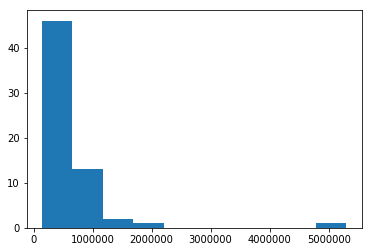

In [67]:
plt.hist(naviews['price'])

In [68]:
df.shape

(21597, 21)

In [70]:
df.head().T


,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,NaN,0,0,0,0
view,0,0,0,0,0


In [55]:
df.loc[df['yr_renovated'].isna(), 'yr_renovated_clean'] = df.loc[df['yr_renovated'].isna(), 'yr_built']

In [56]:
df['yr_renovated_clean'].head()

0       NaN
1       NaN
2    1933.0
3       NaN
4       NaN
Name: yr_renovated_clean, dtype: float64